In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import string

from bs4 import BeautifulSoup as soup
from urllib.request import urlopen as uReq

import seaborn as sns
#import scipy.stats
#from scipy.stats import norm
import sklearn
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import pymc3 as pm
import arviz as az

%matplotlib inline

#sns.set(style="dark")
plt.style.use("ggplot")

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error
from sklearn.metrics import r2_score

from sklearn.preprocessing import OneHotEncoder

/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:7: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:7: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
WARNING (theano.configdefaults): g++ not detected ! Theano will be unable to execute optimized C-implementations (for both CPU and GPU) and will default to Python implementations. Performance will be severely degraded. To remove this warning, set Theano flags cxx to an empty string.
WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


## Navigation
[Data Collection](#1)  
- [Webscraping](#4)

[Data Cleaning](#2)  

[EDA](#3)  

[Linear Regression Model](#5)
  

<a id="1"></a>
# Data Collection

<a id="4"></a>
## Webscraping 


In [2]:
# #data scraped from ev-database.org
# url = "https://ev-database.org/#sort:path~type~order=.rank~number~desc|range-slider-range:prev~next=0~1200|range-slider-acceleration:prev~next=2~23|range-slider-topspeed:prev~next=110~350|range-slider-battery:prev~next=10~200|range-slider-towweight:prev~next=0~2500|range-slider-fastcharge:prev~next=0~1500|paging:currentPage=0|paging:number=9"


In [3]:
# client = uReq(url)
# client
# html = client.read()
# client.close() 

In [4]:
# page_soup = soup(html)

# model_tags = page_soup.findAll("span", {"class": "model"})
# price_tags = page_soup.findAll("span", {"class": "country_de"})
# battery_tags = page_soup.findAll("span", {"class": "battery"})
# shape_tags = page_soup.findAll("span", {"class": ["shape-suv hidden","shape-sedan hidden", "shape-hatchback hidden",
#                                                  "shape-mpv hidden", "shape-station hidden", "shape-cabrio hidden",
#                                                  "shape-coupe hidden", "shape-spv hidden", "shape-pickup hidden"]})
# seats_tags = page_soup.findAll("span", {"title": "Number of seats", "class": None})
# accel_tags = page_soup.findAll("span", {"class": "acceleration"})
# tops_tags = page_soup.findAll("span", {"class": "topspeed"})
# range_tags = page_soup.findAll("span", {"class": "erange_real"})
# eff_tags = page_soup.findAll("span", {"class": "efficiency"})
# fc_tags = page_soup.findAll("span", {"class": "fastcharge_speed hidden"})
# market_tags = page_soup.findAll("span", {"title": "Market Segment"})

In [5]:
# title_divs = page_soup.findAll("div", {"class": "title-wrap"})
# brands = []
# for div in title_divs:
#     brands.append(div.find("span").text)

In [6]:
# models = []
# for i in model_tags:
#     models.append(i.text)
    
# prices = []
# for i in price_tags:
#     prices.append(i.text[1:].replace(",", ""))
    
# battery = []
# for i in battery_tags:
#     battery.append(i.text)
    
# shape = []
# for i in shape_tags:
#    shape.append(i.text)
    
# seats = []
# for i in seats_tags:
#     seats.append(i.text)
    
# accel = []
# for i in accel_tags:
#     accel.append(i.text[0:-4])
    
# tops = []
# for i in tops_tags:
#     tops.append(i.text[0:-5])
    
# ranges = []
# for i in range_tags:
#     ranges.append(i.text[0:-3])
    
# eff = []
# for i in eff_tags:
#     eff.append(i.text[0:-6])

# fc = []
# for i in fc_tags:
#     fc.append(i.text)
    
# market = []
# for i in market_tags:
#     market.append(i.text)

In [7]:
# car_data = pd.DataFrame()
# car_data["Brand"] = brands
# car_data["Model"] = models
# car_data["Price(Euros)"] = prices
# car_data["Type"] = shape
# car_data["BatteryType(kWh)"] = battery
# car_data["NumberSeats"] = seats
# car_data["AccelSpeed(s)"] = accel
# car_data["TopSpeed(km/h)"] = tops
# car_data["Range(km)"] = ranges
# car_data["Efficiency(Wh/km)"] = eff
# car_data["Fastcharge(km/h)"] = fc
# car_data["Market Segment"] = market
# car_data.to_csv("car_data.csv")

In [46]:
#read in pre-scraped car data from ev-database.org
car_data = pd.read_csv("car_data.csv")
car_data.head()

,Unnamed: 0,Brand,Model,Price(Euros),Type,BatteryType(kWh),NumberSeats,AccelSpeed(s),TopSpeed(km/h),Range(km),Efficiency(Wh/km),Fastcharge(km/h),Market Segment
0,0,Tesla,Model Y Long Range Dual Motor,59017,SUV,75.0,5,5.0,217,435,172,670.0,D
1,1,Tesla,Model 3,44668,Sedan,57.5,5,6.1,225,405,142,680.0,D
2,2,Hongqi,E-HS9 99 kWh,/A,SUV,90.0,5,4.9,200,370,243,430.0,F
3,3,Tesla,Model Y,47567,SUV,57.5,5,6.9,217,350,164,580.0,D
4,4,BYD,ATTO 3,44625,SUV,60.5,5,7.3,160,325,186,360.0,C


In [47]:
#read in data from https://afdc.energy.gov/data (US department of energy website)
sales = pd.read_excel("EV_sales.xlsx")
sales.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
0,NaN,U.S. PEV Sales by Model (In Order of Market In...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,Vehicle,Type,2011.0,2012.0,2013.0,2014.0,2015.0,2016.0,2017.0,2018.0,2019.0,Total
2,NaN,Chevy Volt,PHEV,7671.0,23461.0,23094.0,18805.0,15393.0,24739.0,20349.0,18306.0,4915.0,156733
3,NaN,Nissan Leaf,EV,9674.0,9819.0,22610.0,30200.0,17269.0,14006.0,11230.0,14715.0,12365.0,141888
4,NaN,Smart ED,EV,342.0,139.0,923.0,2594.0,1387.0,657.0,544.0,1219.0,680.0,8485


In [48]:
#read in data from insideevs.com
esales = pd.read_excel("europe_sales.xlsx")
esales.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2
0,NaN,NaN,NaN
1,NaN,Best-selling PEV models in Europe YTD 2022,NaN
2,NaN,Best-selling plug-in electric vehicle models i...,NaN
3,NaN,NaN,NaN
4,NaN,Tesla Model Y,83.6


<a id="2"></a>
# Data Cleaning

## cleaning car data

In [49]:
car_data.drop(columns=car_data.columns[0], axis=1, inplace=True)

numeric_columns = ["Price(Euros)", "BatteryType(kWh)", "NumberSeats", "AccelSpeed(s)", "TopSpeed(km/h)", "Range(km)",
                  "Efficiency(Wh/km)", "Fastcharge(km/h)"]

for column in numeric_columns:
    car_data[column] = pd.to_numeric(car_data[column], errors = "coerce")

In [50]:
conversion_rate = 1.09

car_data["Price(USD)"] = car_data["Price(Euros)"]*conversion_rate

In [51]:
car_data["Vehicle"] = car_data["Brand"] + " " + car_data["Model"]
car_data["Vehicle"] = car_data["Vehicle"].apply(lambda x: x.rstrip())

In [52]:
car_data = car_data.dropna()

## cleaning US sales data

In [53]:
us_data = sales.copy()

us_columns = us_data.iloc[1, 1:]

us_data = us_data.iloc[2:-10, 1:]

us_data.columns = us_columns



In [54]:
#separating brand and model into separate columns to match the cars dataframe
us_data.iat[24, 0] = "Volvo XC90 Plug In"

brand_model = us_data["Vehicle"].str.split(" ", n = 1, expand = True)
brand_model.columns = ["Brand", "Model"]
us_data = brand_model.join(us_data)

## cleaning Europe sales data

In [55]:
euro_data = esales.copy()
euro_data = euro_data.iloc[4:, 1:]

euro_data.columns = ["Vehicle", "2022_Sales(1000)"]

brand_model = euro_data["Vehicle"].str.split(" ", n = 1, expand = True)
brand_model.columns = ["Brand", "Model"]
euro_data = brand_model.join(euro_data)


## Functions

In [56]:
def compare(s1, s2):
    remove = string.punctuation + string.whitespace
    mapping = {ord(c): None for c in remove}
    print(f'Mapping: \n{mapping}')
    return s1.translate(mapping) == s2.translate(mapping)


In [57]:
from fuzzywuzzy import fuzz
from fuzzywuzzy import process

def fuzzy_merge(df_1, df_2, key1, key2, threshold=90, limit=2):
    """
    :param df_1: the left table to join
    :param df_2: the right table to join
    :param key1: key column of the left table
    :param key2: key column of the right table
    :param threshold: how close the matches should be to return a match, based on Levenshtein distance
    :param limit: the amount of matches that will get returned, these are sorted high to low
    :return: dataframe with boths keys and matches
    """
    s = df_2[key2].tolist()
    
    m = df_1[key1].apply(lambda x: process.extract(x, s, limit=limit))    
    df_1['matches'] = m
    
    m2 = df_1['matches'].apply(lambda x: ', '.join([i[0] for i in x if i[1] >= threshold]))
    df_1['matches'] = m2
    
    return df_1

<a id="3"></a>
# EDA



In [58]:
car_data.describe()

,Price(Euros),BatteryType(kWh),NumberSeats,AccelSpeed(s),TopSpeed(km/h),Range(km),Efficiency(Wh/km),Fastcharge(km/h),Price(USD)
count,281.000000,281.000000,281.000000,281.000000,281.00000,281.000000,281.000000,281.000000,281.000000
mean,69514.857651,71.359786,5.516014,7.371174,181.55516,366.316726,197.900356,545.765125,75771.194840
std,35621.416830,20.648777,1.416961,3.161395,38.27725,109.862947,32.822097,249.045754,38827.344344
min,22550.000000,21.300000,4.000000,2.100000,125.00000,135.000000,142.000000,150.000000,24579.500000
25%,46950.000000,57.500000,5.000000,4.700000,155.00000,280.000000,173.000000,330.000000,51175.500000
50%,58197.000000,71.000000,5.000000,6.900000,180.00000,380.000000,190.000000,510.000000,63434.730000
75%,77200.000000,85.000000,5.000000,9.000000,205.00000,440.000000,212.000000,660.000000,84148.000000
max,218000.000000,123.000000,9.000000,19.100000,282.00000,685.000000,295.000000,1290.000000,237620.000000


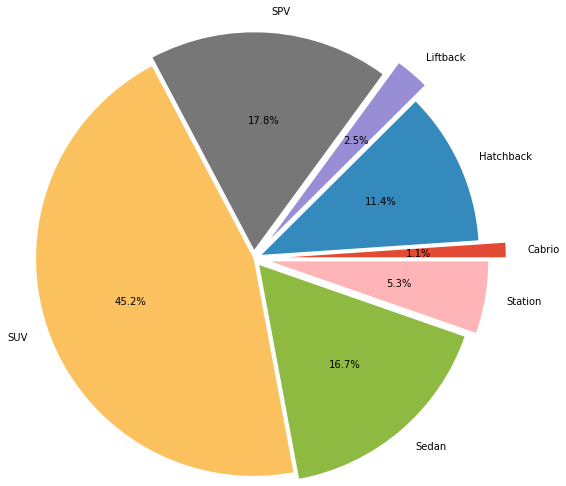

In [59]:
car_pie = car_data.groupby("Type").agg("count")["Brand"]
plt.pie(car_pie, labels = car_pie.index, autopct='%1.1f%%', radius = 2.5, explode = (0.4, 0.1,0.3,0.1,0,0.1,0.2));

In [60]:
corr = car_data.corr(numeric_only = True)
corr

,Price(Euros),BatteryType(kWh),NumberSeats,AccelSpeed(s),TopSpeed(km/h),Range(km),Efficiency(Wh/km),Fastcharge(km/h),Price(USD)
Price(Euros),1.000000,0.705395,-0.129537,-0.566308,0.763884,0.623012,0.119333,0.627296,1.000000
BatteryType(kWh),0.705395,1.000000,-0.094706,-0.608612,0.694453,0.885213,0.138681,0.589698,0.705395
NumberSeats,-0.129537,-0.094706,1.000000,0.640351,-0.481448,-0.406326,0.800287,-0.453259,-0.129537
AccelSpeed(s),-0.566308,-0.608612,0.640351,1.000000,-0.856648,-0.755703,0.438872,-0.684179,-0.566308
TopSpeed(km/h),0.763884,0.694453,-0.481448,-0.856648,1.000000,0.770346,-0.248200,0.786620,0.763884
Range(km),0.623012,0.885213,-0.406326,-0.755703,0.770346,1.000000,-0.312999,0.720732,0.623012
Efficiency(Wh/km),0.119333,0.138681,0.800287,0.438872,-0.248200,-0.312999,1.000000,-0.307880,0.119333
Fastcharge(km/h),0.627296,0.589698,-0.453259,-0.684179,0.786620,0.720732,-0.307880,1.000000,0.627296
Price(USD),1.000000,0.705395,-0.129537,-0.566308,0.763884,0.623012,0.119333,0.627296,1.000000


The highest correlation is between range and battery type. Price appears to have the highest correlation with top speed and battery type, and a very low correlation with efficiency. This is very surprising as efficiency is generally considered a very important metric in a car. 

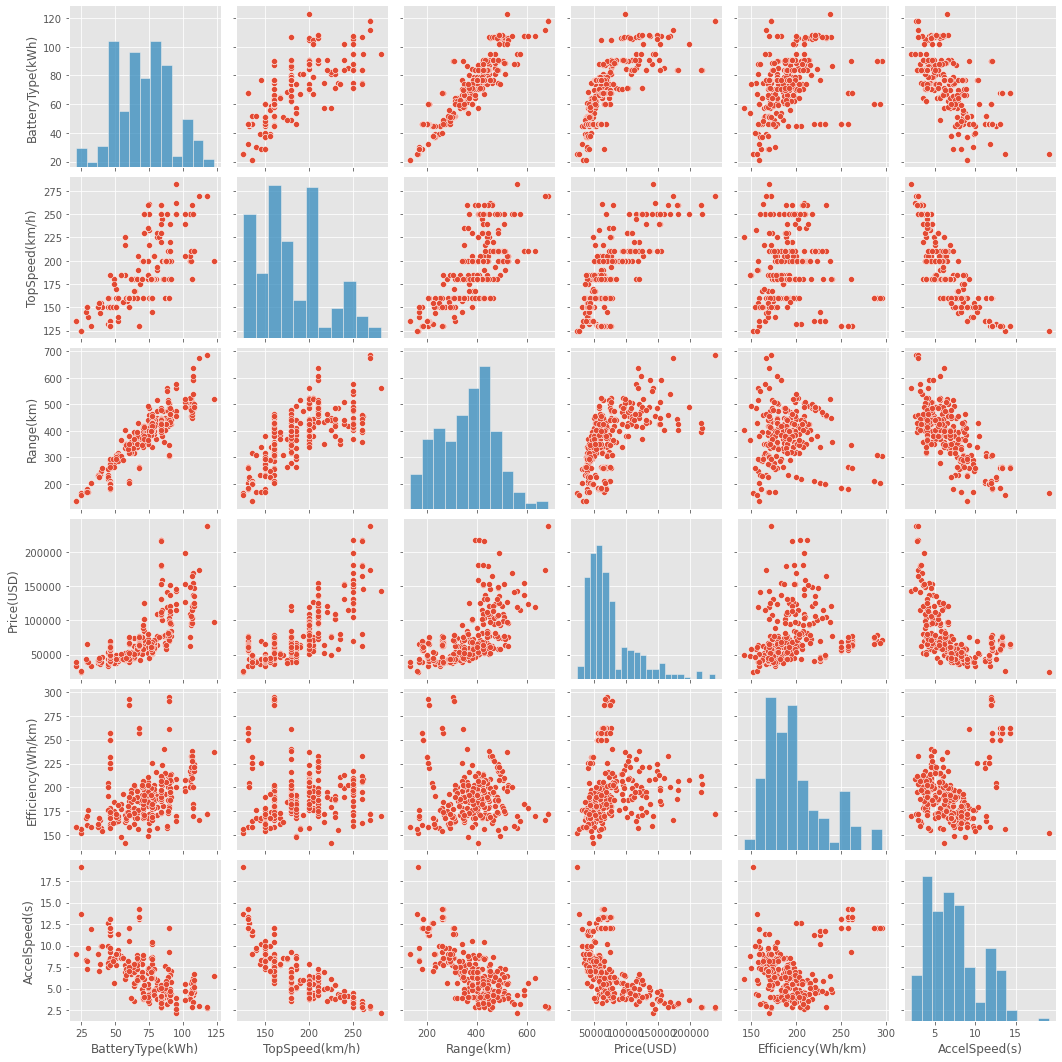

In [61]:
sns.pairplot(car_data[["BatteryType(kWh)", "TopSpeed(km/h)", "Range(km)", "Price(USD)", "Efficiency(Wh/km)", "AccelSpeed(s)"]])

In [62]:
fuzzy_euro = fuzzy_merge(euro_data, car_data, 'Vehicle', 'Vehicle', threshold=85)
fuzzy_euro["Vehicle"] = fuzzy_euro["matches"].str.extract('(.*),')
fuzzy_euro = fuzzy_euro.iloc[:, :4]
fuzzy_euro = fuzzy_euro.drop([10],axis = 0)
top_car_sales = fuzzy_euro.merge(car_data, on = "Vehicle", how = "left")

In [63]:
top_car_sales

,Brand_x,Model_x,Vehicle,2022_Sales(1000),Brand_y,Model_y,Price(Euros),Type,BatteryType(kWh),NumberSeats,AccelSpeed(s),TopSpeed(km/h),Range(km),Efficiency(Wh/km),Fastcharge(km/h),Market Segment,Price(USD)
0,Tesla,Model Y,Tesla Model Y,83.60,Tesla,Model Y,47567.0,SUV,57.5,5,6.9,217,350,164,580.0,D,51848.03
1,Tesla,Model 3,Tesla Model 3,55.33,Tesla,Model 3,44668.0,Sedan,57.5,5,6.1,225,405,142,680.0,D,48688.12
2,Fiat,500 electric,Fiat 500e Hatchback 42 kWh,47.27,Fiat,500e Hatchback 42 kWh,34990.0,Hatchback,37.3,4,9.0,150,235,159,390.0,B,38139.10
3,Volkswagen,ID.4,Volkswagen ID.4 GTX,41.18,Volkswagen,ID.4 GTX,53255.0,SUV,77.0,5,6.3,180,400,193,560.0,C,58047.95
4,Skoda,Enyaq iV,Skoda Enyaq iV 80,36.43,Skoda,Enyaq iV 80,48900.0,SUV,77.0,5,8.6,160,435,177,670.0,C,53301.00
5,Peugeot,e-208,Peugeot e-208,33.47,Peugeot,e-208,39100.0,Hatchback,46.3,5,8.1,150,285,162,460.0,B,42619.00
6,Peugeot,e-208,Peugeot e-208,33.47,Peugeot,e-208,41850.0,Hatchback,48.1,5,8.2,150,295,163,450.0,B,45616.50
7,Dacia,Spring,Dacia Spring Electric 45,31.55,Dacia,Spring Electric 45,22550.0,Hatchback,25.0,4,19.1,125,165,152,180.0,A,24579.50
8,Hyundai,Kona Electric,Hyundai Kona Electric 64 kWh,30.44,Hyundai,Kona Electric 64 kWh,42900.0,SUV,64.0,5,7.9,167,395,162,370.0,B,46761.00
9,Skoda,Enyaq iV,Skoda Enyaq iV 80,30.43,Skoda,Enyaq iV 80,48900.0,SUV,77.0,5,8.6,160,435,177,670.0,C,53301.00


In [64]:
corr = top_car_sales.corr(numeric_only = True)

corr

,2022_Sales(1000),Price(Euros),BatteryType(kWh),NumberSeats,AccelSpeed(s),TopSpeed(km/h),Range(km),Efficiency(Wh/km),Fastcharge(km/h),Price(USD)
2022_Sales(1000),1.000000,0.243465,-0.005193,0.092131,-0.349474,0.771189,0.079959,-0.185413,0.321881,0.243465
Price(Euros),0.243465,1.000000,0.927555,0.821847,-0.846878,0.594213,0.906241,0.634019,0.855386,1.000000
BatteryType(kWh),-0.005193,0.927555,1.000000,0.755281,-0.648100,0.410534,0.957883,0.696547,0.790516,0.927555
NumberSeats,0.092131,0.821847,0.755281,1.000000,-0.731277,0.522532,0.804545,0.354933,0.703482,0.821847
AccelSpeed(s),-0.349474,-0.846878,-0.648100,-0.731277,1.000000,-0.666216,-0.712062,-0.292814,-0.737037,-0.846878
TopSpeed(km/h),0.771189,0.594213,0.410534,0.522532,-0.666216,1.000000,0.565782,-0.114139,0.653541,0.594213
Range(km),0.079959,0.906241,0.957883,0.804545,-0.712062,0.565782,1.000000,0.463184,0.847851,0.906241
Efficiency(Wh/km),-0.185413,0.634019,0.696547,0.354933,-0.292814,-0.114139,0.463184,1.000000,0.335664,0.634019
Fastcharge(km/h),0.321881,0.855386,0.790516,0.703482,-0.737037,0.653541,0.847851,0.335664,1.000000,0.855386
Price(USD),0.243465,1.000000,0.927555,0.821847,-0.846878,0.594213,0.906241,0.634019,0.855386,1.000000


I am most interested to see which variables have the highest correlation with price and sales. Within this sample of best selling cars, the price is more highly correlated with battery type, range, and fast charge, and in general has higher correlations with almost every metric than the entire dataset. Within this sample, sales are most highly correlated with top speed. 


Text(0, 0.5, 'Sales in 2022 (1000 units)')

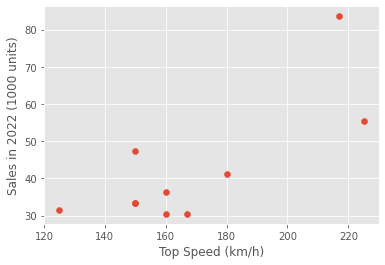

In [65]:
plt.scatter(top_car_sales["TopSpeed(km/h)"], top_car_sales["2022_Sales(1000)"])
plt.xlabel("Top Speed (km/h)")
plt.ylabel("Sales in 2022 (1000 units)")

Text(0, 0.5, 'Price(USD)')

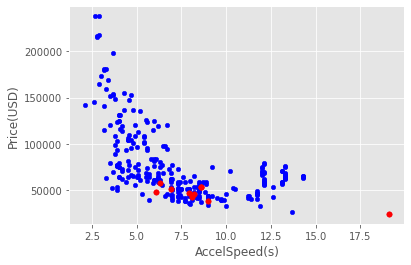

In [66]:
x = "AccelSpeed(s)"
y = "Price(USD)"
plt.scatter(car_data[x], car_data[y], c = "blue", s = 20)
plt.scatter(top_car_sales[x], top_car_sales[y], c = "red", s = 30)
plt.xlabel(x)
plt.ylabel(y)

In this visualization of acceleration speed vs price, we can see that most of the top sellers are clustered together where price is closer to the minimum and acceleration speed is closer to the middle. This makes sense since more people can afford lower priced cars, and most people tend to buy cars with moderate performance. There is one outlier with very slow acceleration speed that is still a top selling car; it would be interesting to investigate this and figure out how this model has managed to perform so well despite its poor acceleration. 

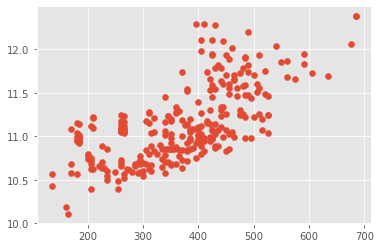

In [67]:
plt.scatter(car_data["Range(km)"], np.log(car_data["Price(USD)"]))

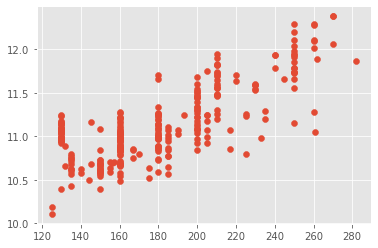

In [68]:
plt.scatter(car_data["TopSpeed(km/h)"], np.log(car_data["Price(USD)"]))

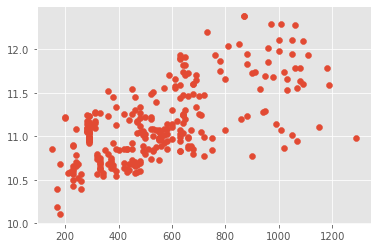

In [69]:
plt.scatter(car_data["Fastcharge(km/h)"], np.log(car_data["Price(USD)"]))

<a id="5"></a>
## Linear Regression

### one hot encoding car type

In [70]:
oh_enc = OneHotEncoder()

In [71]:
oh_enc.fit(car_data[['Type']])
dummies = oh_enc.transform(car_data[['Type']]).toarray()

car_data = (car_data
              .join(
                  pd.DataFrame(dummies, index = car_data.index, columns = oh_enc.get_feature_names_out(["Type"]))))
car_data = car_data.drop(columns=["Type"]) 
car_data

,Brand,Model,Price(Euros),BatteryType(kWh),NumberSeats,AccelSpeed(s),TopSpeed(km/h),Range(km),Efficiency(Wh/km),Fastcharge(km/h),Market Segment,Price(USD),Vehicle,Type_Cabrio,Type_Hatchback,Type_Liftback,Type_SPV,Type_SUV,Type_Sedan,Type_Station
0,Tesla,Model Y Long Range Dual Motor,59017.0,75.0,5,5.0,217,435,172,670.0,D,64328.53,Tesla Model Y Long Range Dual Motor,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,Tesla,Model 3,44668.0,57.5,5,6.1,225,405,142,680.0,D,48688.12,Tesla Model 3,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,Tesla,Model Y,47567.0,57.5,5,6.9,217,350,164,580.0,D,51848.03,Tesla Model Y,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,BYD,ATTO 3,44625.0,60.5,5,7.3,160,325,186,360.0,C,48641.25,BYD ATTO 3,0.0,0.0,0.0,0.0,1.0,0.0,0.0
5,MG,MG4 Electric 64 kWh,39990.0,61.7,5,7.9,160,360,171,440.0,C,43589.10,MG MG4 Electric 64 kWh,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
330,Mercedes,EQV 250 Extra-Long,68949.0,60.0,7,12.0,160,210,286,200.0,N,75154.41,Mercedes EQV 250 Extra-Long,0.0,0.0,0.0,1.0,0.0,0.0,0.0
331,Fiat,E-Ulysse L2 50 kWh,55990.0,46.3,8,12.1,130,185,250,290.0,N,61029.10,Fiat E-Ulysse L2 50 kWh,0.0,0.0,0.0,1.0,0.0,0.0,0.0
332,Mercedes,eVito Tourer Extra-Long 60 kWh,61571.0,60.0,9,12.0,160,205,293,300.0,N,67112.39,Mercedes eVito Tourer Extra-Long 60 kWh,0.0,0.0,0.0,1.0,0.0,0.0,0.0
333,Porsche,Taycan Turbo Cross Turismo,165848.0,83.7,4,3.3,250,425,197,1050.0,F,180774.32,Porsche Taycan Turbo Cross Turismo,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [76]:
X = car_data[["BatteryType(kWh)", "NumberSeats", "AccelSpeed(s)", "TopSpeed(km/h)", "Range(km)", "Efficiency(Wh/km)",
             "Fastcharge(km/h)", "Type_Cabrio", "Type_Hatchback", "Type_Liftback", "Type_SPV", "Type_SUV", 
              "Type_Sedan", "Type_Station"]]
y = car_data['Price(USD)']

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2, random_state = 100)

# sklearn
model=LinearRegression()
model.fit(X_train,y_train)

pred_y = model.predict(X_test)

print(f'coefficients: {model.coef_}')
print(f'train score: {model.score(X_train,y_train)}')
print(f'test score: {model.score(X_test,y_test)}')

coefficients: [ 9.42785590e+02  1.75797221e+03  4.98781271e+01  5.05059351e+02
 -8.10540831e+01  1.10872437e+02  1.22213634e+01  2.77361767e+04
 -2.11129811e+02 -1.59795163e+04 -3.18905738e+03 -1.38612678e+04
  1.89574184e+03  3.60905281e+03]
train score: 0.7356124984151471
test score: 0.7166922951160326


In [77]:
print('MAE:',mean_absolute_error(y_test,pred_y))
print('MSE:',mean_squared_error(y_test, pred_y))
print('RMSE:',np.sqrt(mean_squared_error(y_test, pred_y)))

MAE: 17432.824233339023
MSE: 737785409.0140032
RMSE: 27162.20552558284


In [78]:
# with statsmodels
X_train = sm.add_constant(X_train) # adding a constant
 
smmodel = sm.OLS(y_train, X_train).fit()
predictions = smmodel.predict(X_train) 
 
print_model = smmodel.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:             Price(USD)   R-squared:                       0.736
Model:                            OLS   Adj. R-squared:                  0.719
Method:                 Least Squares   F-statistic:                     44.95
Date:                Wed, 05 Jul 2023   Prob (F-statistic):           2.19e-53
Time:                        15:19:12   Log-Likelihood:                -2505.4
No. Observations:                 224   AIC:                             5039.
Df Residuals:                     210   BIC:                             5087.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const             -7.655e+04   4.24e+0

/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)


In [79]:
car_data["logPrice"] = np.log(car_data["Price(USD)"])

Since the price data is right skewed, we can apply a log function then run the regression on the updated response variable

In [80]:
X = car_data[["BatteryType(kWh)",  "AccelSpeed(s)", "TopSpeed(km/h)", "Range(km)", "NumberSeats",
             "Fastcharge(km/h)", "Type_Cabrio", "Type_Hatchback", "Type_Liftback", "Type_SPV", "Type_SUV", 
              "Type_Sedan", "Type_Station"]]
y = car_data['logPrice']

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2, random_state = 100)

# sklearn
model=LinearRegression()
model.fit(X_train,y_train)

pred_y = model.predict(X_test)

print(f'coefficients: {model.coef_}')
print(f'train score: {model.score(X_train,y_train)}')
print(f'test score: {model.score(X_test,y_test)}')

coefficients: [ 1.54987904e-02 -1.96494531e-02  4.25432769e-03 -1.51832154e-03
  3.71671619e-02  1.98444699e-04  3.41017258e-01 -1.00869835e-01
 -1.60621025e-01  6.73748441e-02 -1.48939863e-01  1.30862598e-02
 -1.10476390e-02]
train score: 0.8317292120466655
test score: 0.8299302970069432


In [81]:
# with statsmodels
X_train = sm.add_constant(X_train) # adding a constant
 
smmodel = sm.OLS(y_train, X_train).fit()
predictions = smmodel.predict(X_train) 
 
print_model = smmodel.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:               logPrice   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     86.91
Date:                Wed, 05 Jul 2023   Prob (F-statistic):           1.11e-74
Time:                        15:19:16   Log-Likelihood:                 84.941
No. Observations:                 224   AIC:                            -143.9
Df Residuals:                     211   BIC:                            -99.53
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                8.4828      0.181  

/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)


In [90]:
X = car_data[["BatteryType(kWh)", "TopSpeed(km/h)", "Range(km)", "NumberSeats",
             "Fastcharge(km/h)", "Type_Cabrio", "Type_Hatchback", "Type_Liftback", "Type_SPV", "Type_SUV", 
              "Type_Sedan", "Type_Station"]]
y = car_data['logPrice']

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2, random_state = 100)

# sklearn
model=LinearRegression()
model.fit(X_train,y_train)

pred_y = model.predict(X_test)

print(f'coefficients: {model.coef_}')
print(f'train score: {model.score(X_train,y_train)}')
print(f'test score: {model.score(X_test,y_test)}')

coefficients: [ 1.59639797e-02  5.17926469e-03 -1.55341565e-03  3.38210679e-02
  1.86374464e-04  3.55954905e-01 -1.00491701e-01 -1.51359183e-01
  1.48126033e-02 -1.37786961e-01  2.54887971e-02 -6.61846011e-03]
train score: 0.8280186615735312
test score: 0.827051138963188


In [91]:
# with statsmodels
X_train = sm.add_constant(X_train) # adding a constant
 
smmodel = sm.OLS(y_train, X_train).fit()
predictions = smmodel.predict(X_train) 
 
print_model = smmodel.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:               logPrice   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     92.79
Date:                Wed, 05 Jul 2023   Prob (F-statistic):           1.10e-74
Time:                        15:21:07   Log-Likelihood:                 82.498
No. Observations:                 224   AIC:                            -141.0
Df Residuals:                     212   BIC:                            -100.1
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                8.2152      0.133  

/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)


In [89]:
print('MAE:',mean_absolute_error(y_test,pred_y))
print('MSE:',mean_squared_error(y_test, pred_y))
print('RMSE:',np.sqrt(mean_squared_error(y_test, pred_y)))

MAE: 0.1663831344427702
MSE: 0.04602258984844303
RMSE: 0.21452876228711856


Based on these regression results, the model performs best after we apply a log transformation to price, which achieves an R-squared score of 0.828 and significant p-values for all coefficients. However, beyond the log transformation, changing the x-variables did not seem to have a major effect on the regression results. 

Some of these results are also slightly questionable. For example, it's not intuitive why Range would have a negative correlation with price. 